In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os
# imports for supplemental Data
import holidays
import datetime as dt
from holidays import country_holidays
#import tick customization tools
import matplotlib.ticker as mticks
import matplotlib.dates as mdates
## Setting figures to timeseries-friendly
plt.rcParams['figure.figsize'] = (12,4)
plt.rcParams['figure.facecolor'] = 'white'
sns.set_context("talk", font_scale=0.9)
# set random seed
SEED = 321
np.random.seed(SEED)
#display more columns
pd.set_option('display.max_columns',50)



In [2]:
import glob
q = "Data/Chicago/*.csv"
chunked_files = sorted(glob.glob(q))
# Show up to first 30 files
chunked_files[:30]

['Data/Chicago\\Chicago-Crime_2001.csv',
 'Data/Chicago\\Chicago-Crime_2002.csv',
 'Data/Chicago\\Chicago-Crime_2003.csv',
 'Data/Chicago\\Chicago-Crime_2004.csv',
 'Data/Chicago\\Chicago-Crime_2005.csv',
 'Data/Chicago\\Chicago-Crime_2006.csv',
 'Data/Chicago\\Chicago-Crime_2007.csv',
 'Data/Chicago\\Chicago-Crime_2008.csv',
 'Data/Chicago\\Chicago-Crime_2009.csv',
 'Data/Chicago\\Chicago-Crime_2010.csv',
 'Data/Chicago\\Chicago-Crime_2011.csv',
 'Data/Chicago\\Chicago-Crime_2012.csv',
 'Data/Chicago\\Chicago-Crime_2013.csv',
 'Data/Chicago\\Chicago-Crime_2014.csv',
 'Data/Chicago\\Chicago-Crime_2015.csv',
 'Data/Chicago\\Chicago-Crime_2016.csv',
 'Data/Chicago\\Chicago-Crime_2017.csv',
 'Data/Chicago\\Chicago-Crime_2018.csv',
 'Data/Chicago\\Chicago-Crime_2019.csv',
 'Data/Chicago\\Chicago-Crime_2020.csv',
 'Data/Chicago\\Chicago-Crime_2021.csv',
 'Data/Chicago\\Chicago-Crime_2022.csv',
 'Data/Chicago\\Chicago-Crime_2023.csv']

In [3]:
# Loading all files
df_list = []
for file in chunked_files:
    temp_df = pd.read_csv(file, index_col=0, lineterminator='\n')
    df_list.append(temp_df)
    
# concat
df = pd.concat(df_list)
df.head()

,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude\r
ID,,,,,,,,,,,
6154338,01/01/2001 01:00:00 PM,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,831,8.0,15.0,41.774819,-87.702896431\r
1313213,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,VEHICLE NON-COMMERCIAL,False,True,731,7.0,NaN,41.765396,-87.626697771\r
1328315,01/01/2001 01:00:00 AM,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,RESIDENCE,False,False,725,7.0,NaN,41.771269,-87.662929135\r
1311626,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1033,10.0,NaN,41.848786,-87.704086603\r
1313086,01/01/2001 01:00:00 PM,THEFT,OVER $500,OTHER,False,False,1732,17.0,NaN,41.953070,-87.716715611\r


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7899126 entries, 6154338 to 13217098
Data columns (total 11 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Date                  object 
 1   Primary Type          object 
 2   Description           object 
 3   Location Description  object 
 4   Arrest                bool   
 5   Domestic              bool   
 6   Beat                  int64  
 7   District              float64
 8   Ward                  float64
 9   Latitude              float64
            object 
dtypes: bool(2), float64(3), int64(1), object(5)
memory usage: 617.7+ MB


In [5]:
# drop duplicates
df = df.drop_duplicates()



In [6]:
#check for duplicates
df.duplicated().sum()

0

In [18]:
# feature engineering for dates
df['Year'] = df['Datetime'].dt.year
df['Month'] = df['Datetime'].dt.month_name()
df['Day of Month'] = df['Datetime'].dt.day
df['Day of Week'] = df['Datetime'].dt.day_name()
df['Hour'] = df['Datetime'].dt.hour
df['Month']=df['Datetime'].dt.month
df



KeyError: 'Datetime'

In [7]:
#Converte date to datetime
df["Date"] = pd.to_datetime(df["Date"])
df.info()

C:\Users\jezep\AppData\Local\Temp\ipykernel_7924\2698217800.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Date"] = pd.to_datetime(df["Date"])


<class 'pandas.core.frame.DataFrame'>
Index: 7879328 entries, 6154338 to 13217098
Data columns (total 11 columns):
 #   Column                Dtype         
---  ------                -----         
 0   Date                  datetime64[ns]
 1   Primary Type          object        
 2   Description           object        
 3   Location Description  object        
 4   Arrest                bool          
 5   Domestic              bool          
 6   Beat                  int64         
 7   District              float64       
 8   Ward                  float64       
 9   Latitude              float64       
            object        
dtypes: bool(2), datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 616.2+ MB


In [8]:
#Set date as index
df = df.set_index("Date")
df.head()

,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude\r
Date,,,,,,,,,,
2001-01-01 13:00:00,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,831,8.0,15.0,41.774819,-87.702896431\r
2001-01-01 01:00:00,BATTERY,SIMPLE,VEHICLE NON-COMMERCIAL,False,True,731,7.0,NaN,41.765396,-87.626697771\r
2001-01-01 01:00:00,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,RESIDENCE,False,False,725,7.0,NaN,41.771269,-87.662929135\r
2001-01-01 01:00:00,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1033,10.0,NaN,41.848786,-87.704086603\r
2001-01-01 13:00:00,THEFT,OVER $500,OTHER,False,False,1732,17.0,NaN,41.953070,-87.716715611\r


Topic 1) Comparing Police Districts:

    - Which district has the most crimes? Which has the least?

In [12]:
df['District'].value_counts()

District
8.0     529359
11.0    502466
6.0     461174
7.0     454136
25.0    448029
4.0     447548
3.0     399724
12.0    391713
9.0     384715
2.0     373327
19.0    354954
18.0    354432
5.0     348978
10.0    339457
15.0    336121
1.0     319638
14.0    304759
16.0    264073
22.0    258333
24.0    238813
17.0    227494
20.0    139787
31.0       247
21.0         4
Name: count, dtype: int64

- District 8.0 has the most number of crimes.
- District 21.0 has the least number of crimes.



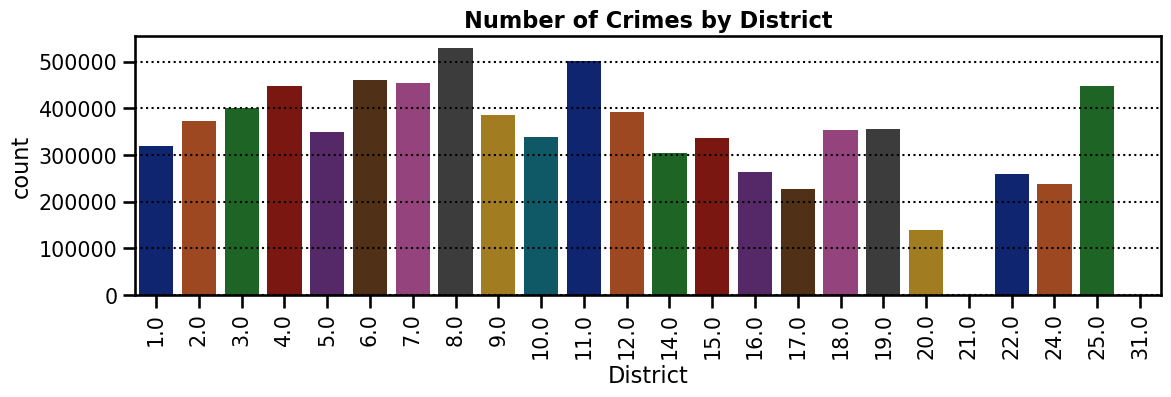

In [26]:
# visualize crimes by district no.
ax = sns.countplot(data=df, x='District',palette='dark');
plt.xticks(rotation=90);
plt.grid(which= 'major',axis= 'y',color= 'k', ls=':')
plt.tight_layout()
plt.title('Number of Crimes by District', fontweight = 'bold');
plt.savefig('crimesByDistrict.jpeg', dpi=300);

Q2: What months have the most crime? What months have the least?


In [13]:
#Monthly data
ts = df.resample("M").size().loc['2001':]
ts



Date
2001-01-31    38036
2001-02-28    33719
2001-03-31    40429
2001-04-30    40042
2001-05-31    41758
              ...  
2023-05-31    22000
2023-06-30    22384
2023-07-31    23623
2023-08-31    23565
2023-09-30    13465
Freq: M, Length: 273, dtype: int64

In [14]:
#correct freq
ts = df.resample("M").size()

In [15]:
most_crimes = ts.idxmax()
most_crimes

Timestamp('2002-07-31 00:00:00')

In [16]:
ts.loc[most_crimes]

45873

In [20]:
df['Year']  = df.index.year
df['Month'] = df.index.month_name()
df['HourOfDay'] = df.index.hour 
df.head()

,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude\r,Year,MonthName,HourOfDay,Month
Date,,,,,,,,,,,,,,
2001-01-01 13:00:00,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,831,8.0,15.0,41.774819,-87.702896431\r,2001,January,13,January
2001-01-01 01:00:00,BATTERY,SIMPLE,VEHICLE NON-COMMERCIAL,False,True,731,7.0,NaN,41.765396,-87.626697771\r,2001,January,1,January
2001-01-01 01:00:00,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,RESIDENCE,False,False,725,7.0,NaN,41.771269,-87.662929135\r,2001,January,1,January
2001-01-01 01:00:00,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1033,10.0,NaN,41.848786,-87.704086603\r,2001,January,1,January
2001-01-01 13:00:00,THEFT,OVER $500,OTHER,False,False,1732,17.0,NaN,41.953070,-87.716715611\r,2001,January,13,January


In [21]:
# find the values
df['Month'].value_counts()

Month
July         739197
August       732064
May          703469
June         702624
September    679877
October      674212
March        648672
April        646339
January      620715
November     607415
December     578403
February     546341
Name: count, dtype: int64

- July has the most crime
- February has the least crime

Topic 2) Crimes Across the Years:

- Is the total number of crimes increasing or decreasing across the years?

In [27]:
df['Year'].value_counts()

Year
2002    485219
2001    484678
2003    473861
2004    467515
2005    452087
2006    446174
2007    435718
2008    426308
2009    392110
2010    369894
2011    351430
2012    335791
2013    306979
2014    275356
2016    269294
2017    268596
2018    268526
2015    264371
2019    260936
2022    238551
2020    211943
2021    208542
2023    185449
Name: count, dtype: int64

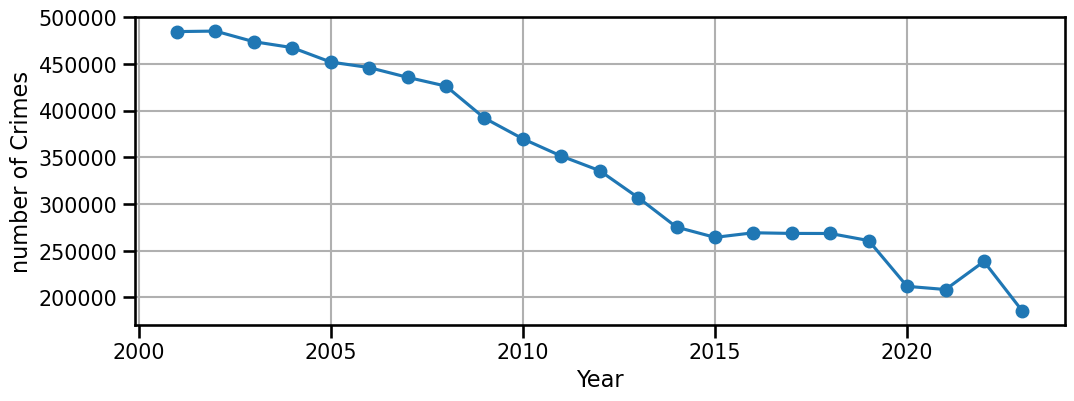

In [28]:
year_count = df['Year'].value_counts().sort_index()
year_count.plot(style='o-',grid=True,ylabel='number of Crimes', xlabel='Year');



- The graph shows that the is decreasing acroos the years